In [1]:
%load_ext autoreload
%autoreload 2

# Boiler plate
- import all packages
- emulate snakemake so can load config as usual
- load the network you want
TODO: make it easier to restore old runs
TODO: hide all the boiler pates in a file

In [2]:
import logging
import pypsa
import os.path

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# running the jupyter notebook on the compute nodes doesnt build the path as expected, you have to manually do this
import IPython

working_directory = os.path.dirname(IPython.extract_module_locals()[1]['__vsc_ipynb_file__'])
os.chdir(working_directory)


In [4]:

# from make_summary import assign_carriers
from _helpers import configure_logging, mock_snakemake
from constants import PLOT_COST_UNITS, PLOT_CAP_UNITS,PLOT_SUPPLY_UNITS

logger = logging.getLogger(__name__)


In [5]:
PLANNING_YEAR = 2060
snakemake = mock_snakemake(
    "plot_network",
    snakefile_path=os.path.abspath("../"),
    topology="current+FCG",
    pathway="exp175",
    planning_horizons=PLANNING_YEAR,
    heating_demand="positive",
)

configure_logging(snakemake, logger=logger)
config = snakemake.config
tech_colors = config["plotting"]["tech_colors"]


ntw_path = snakemake.input.network
# ntw_path = "my_results""
# ntw_path = f"/home/ivanra/downloads/PaperResultsXiaowei_networks/postnetwork-ll-current+Neighbor-exponential175-{PLANNING_YEAR}.nc"
n = pypsa.Network(ntw_path)


INFO:pypsa.io:Imported network ntwk_2060.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores


### Fix network for plotting // add missing info

In [6]:
from _plot_utilities import fix_network_names_colors, determine_plottable
from plot_network import plot_cost_map, plot_map
fix_network_names_colors(n, config)
determine_plottable(n)

/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/_plot_utilities.py:135: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.carriers.color.fillna(NAN_COLOR, inplace=True)


# Plot maps

### plot capex

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:178: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:336: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


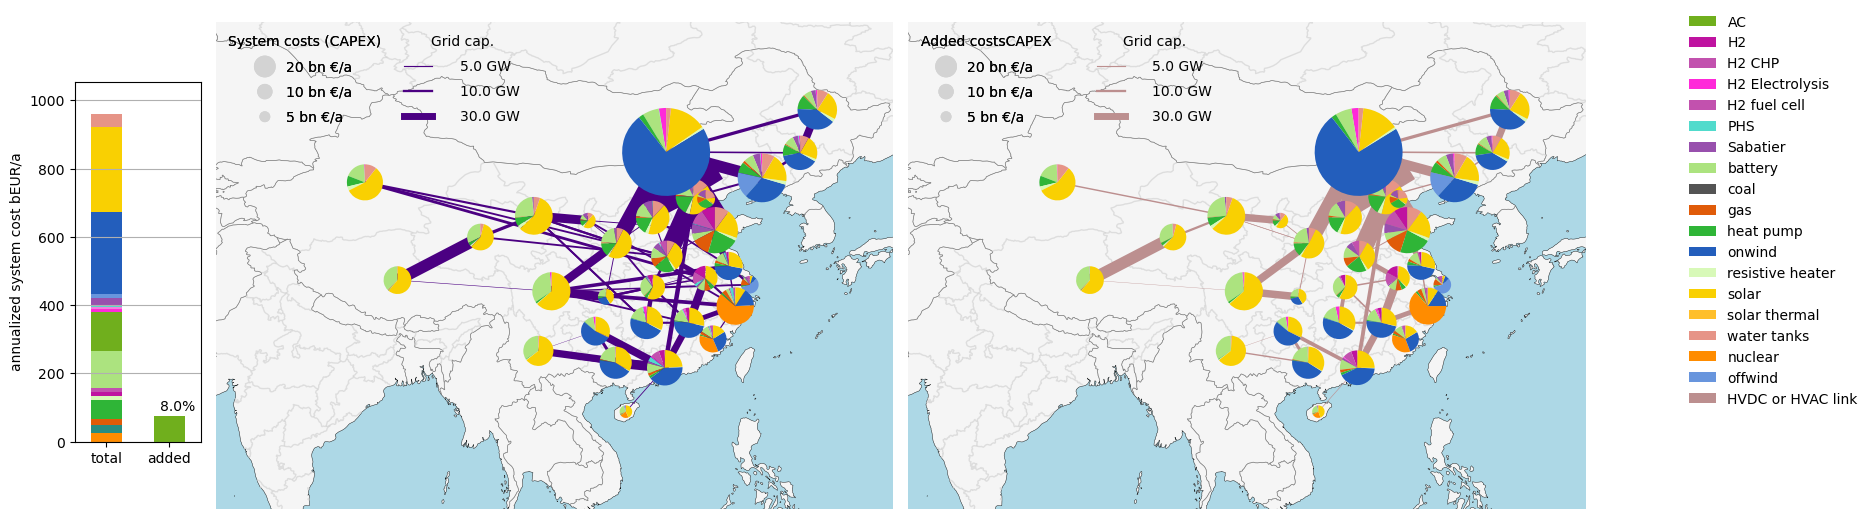

In [7]:
ax = plot_cost_map(n, config["plotting"], cost_pannel=True, capex_only=True)

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:178: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:336: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


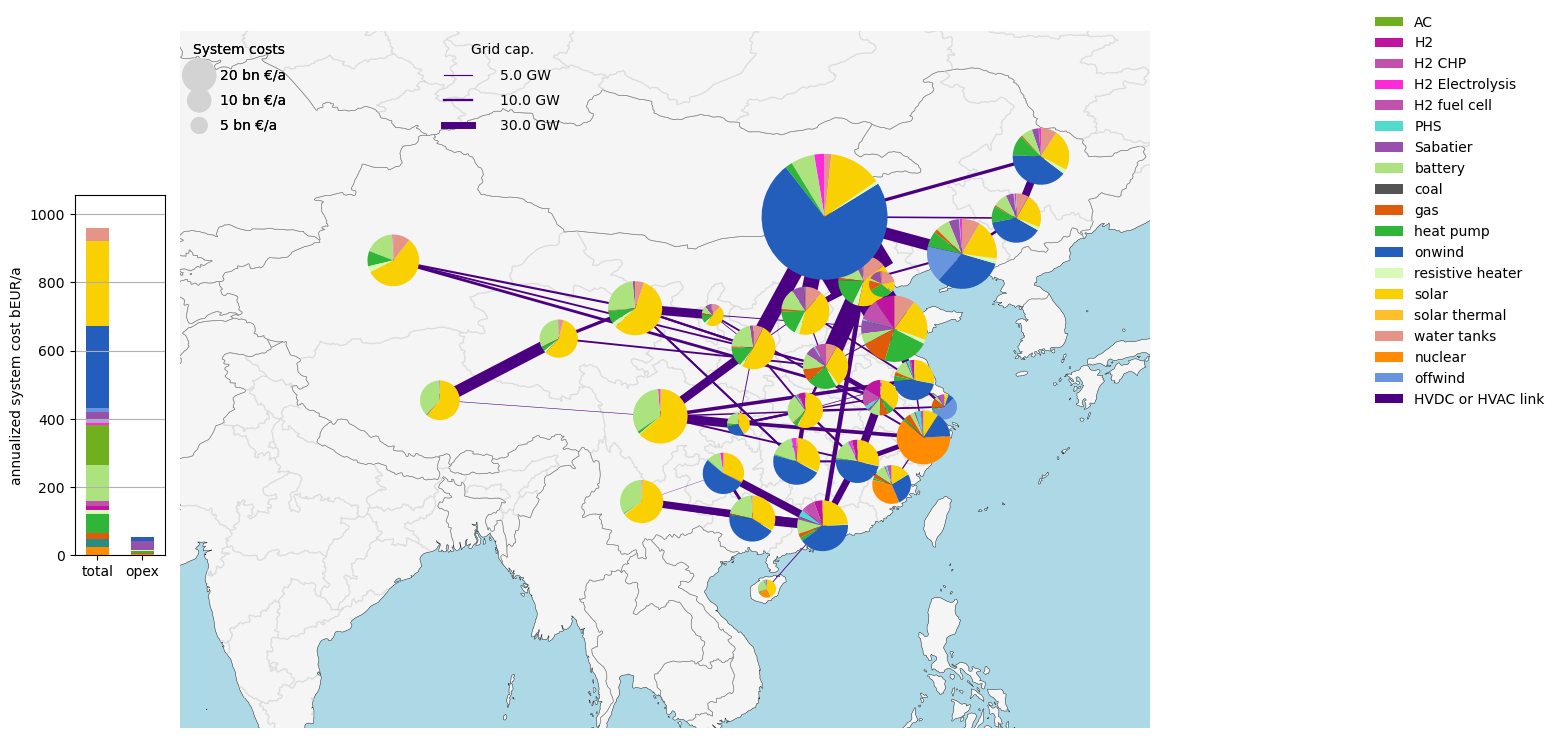

In [8]:
# TODO fix layout
ax = plot_cost_map(n, config["plotting"], cost_pannel=True, plot_additions=False, capex_only=False)

## print link capacities
Sanity check

In [ ]:
v_link = n.links[n.links.carrier=="AC"].copy()
v_link.index = v_link.apply(lambda row: row["bus0"]+"-"+row["bus1"]+" pos" if "positive" in row.name else row["bus1"]+"-"+row["bus0"]+" rev" , axis=1)
v_link.p_nom_opt.sort_index()

Anhui-Henan pos          20979.196204
Anhui-Henan rev          20979.196204
Anhui-Hubei pos           6526.730959
Anhui-Hubei rev           6526.730959
Anhui-Jiangsu pos        10000.003265
                             ...     
Shanghai-Zhejiang rev     9500.053863
Sichuan-Tibet pos         2385.615097
Sichuan-Tibet rev         2385.615097
Sichuan-Zhejiang pos     16001.873588
Sichuan-Zhejiang rev     16001.873588
Name: p_nom_opt, Length: 154, dtype: float64

In [ ]:
h2_pip = n.links[n.links.carrier=="H2 pipeline"].copy()
h2_pip.index = h2_pip.apply(lambda row: row["bus0"]+"-"+row["bus1"]+" pos" if "positive" in row.name else row["bus1"]+"-"+row["bus0"]+" rev" , axis=1)
h2_pip[["p_nom_opt"]].sort_index()

p_nom_opt
Anhui H2-Henan H2 pos        3101.836854
Anhui H2-Henan H2 rev        3101.836854
Anhui H2-Hubei H2 pos         321.381005
Anhui H2-Hubei H2 rev         321.381005
Anhui H2-Jiangsu H2 pos      7546.520174
...                                  ...
Shanghai H2-Zhejiang H2 rev   310.876290
Sichuan H2-Tibet H2 pos       280.629805
Sichuan H2-Tibet H2 rev       280.629805
Sichuan H2-Zhejiang H2 pos     18.022986
Sichuan H2-Zhejiang H2 rev     18.022986

[154 rows x 1 columns]

## plot electricy generation map

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:491: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:452: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


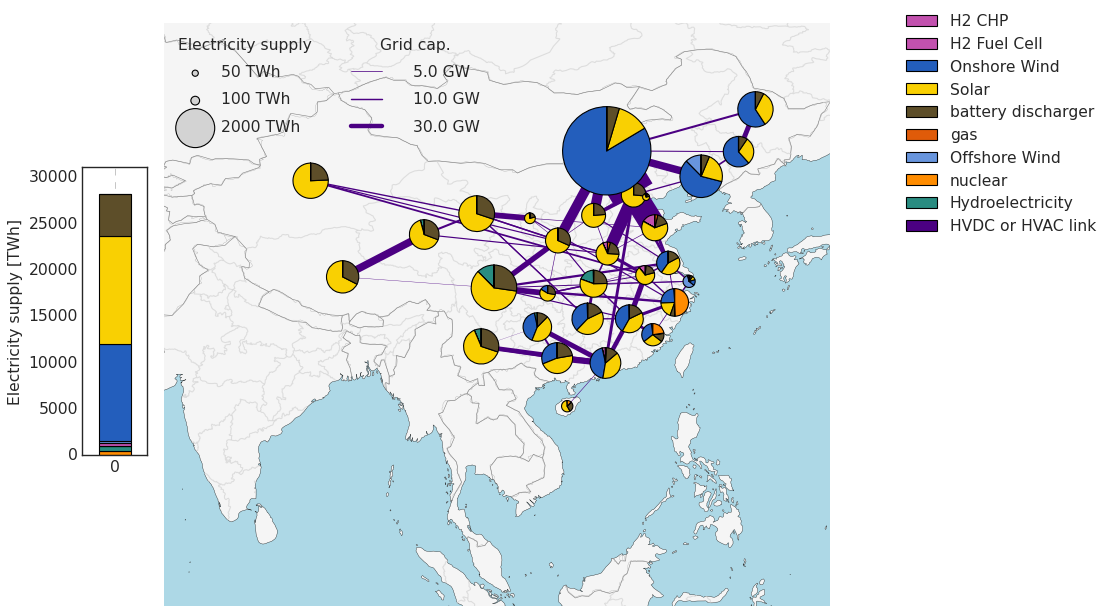

In [11]:
from plot_network import plot_energy_map
from _plot_utilities import set_plot_style
set_plot_style(
    style_config_file= os.path.abspath("../../config/plotting_styles/network_map.mplstyle"),
    base_styles=["classic", "seaborn-v0_8-white"],
)
plot_energy_map(n,config["plotting"], carrier="AC", components = ["Generator", "Link"])

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:491: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:452: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


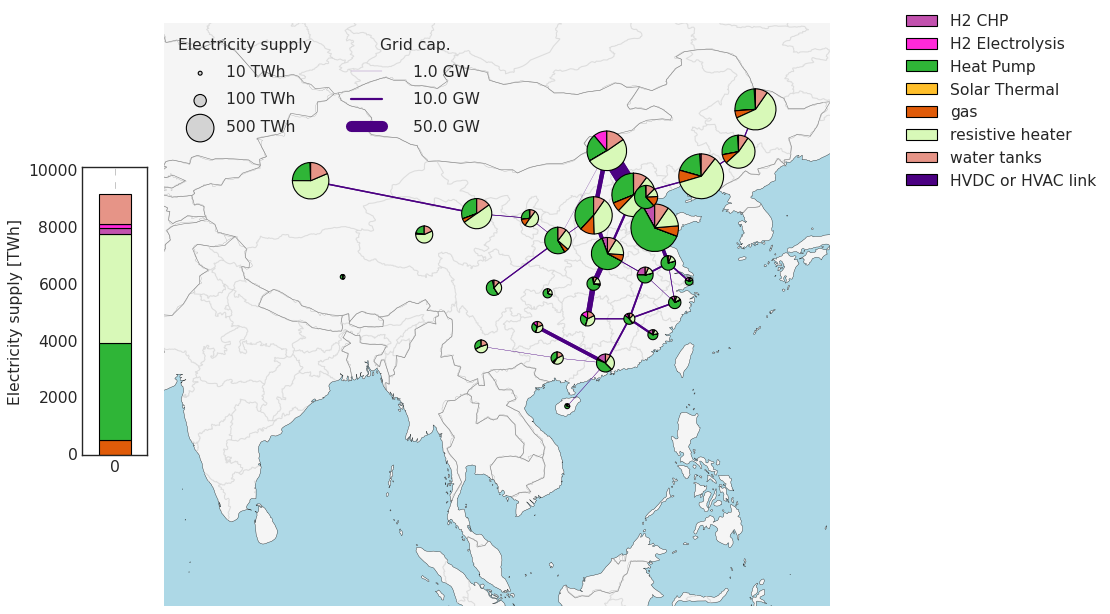

In [12]:
from plot_network import plot_energy_map
from _plot_utilities import set_plot_style
set_plot_style(
    style_config_file= os.path.abspath("../../config/plotting_styles/network_map.mplstyle"),
    #snakemake.config["plotting"]["network_style_config_file"],
    base_styles=["classic", "seaborn-v0_8-white"],
)
plot_energy_map(n,config["plotting"], carrier="heat", components = ["Generator", "Link"])

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


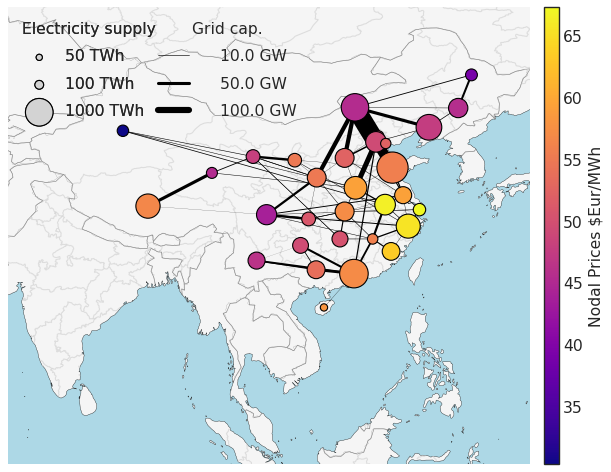

In [13]:
from plot_network import plot_nodal_prices
plot_nodal_prices(n, config["plotting"], "AC")

In [ ]:
nodal_prices = n.statistics.revenue( groupby=pypsa.statistics.get_bus_and_carrier_and_bus_carrier, comps="Load", bus_carrier="AC")/ n.statistics.supply(comps="Load", groupby=pypsa.statistics.get_bus_and_carrier_and_bus_carrier, bus_carrier="AC")*-1
nodal_prices = nodal_prices.droplevel(1)
nodal_prices

bus            bus_carrier
Anhui          AC             inf
Beijing        AC             inf
Chongqing      AC             inf
Fujian         AC             inf
Gansu          AC             inf
Guangdong      AC             inf
Guangxi        AC             inf
Guizhou        AC             inf
Hainan         AC             inf
Hebei          AC             inf
Heilongjiang   AC             inf
Henan          AC             inf
Hubei          AC             inf
Hunan          AC             inf
InnerMongolia  AC             inf
Jiangsu        AC             inf
Jiangxi        AC             inf
Jilin          AC             inf
Liaoning       AC             inf
Ningxia        AC             inf
Qinghai        AC             inf
Shaanxi        AC             inf
Shandong       AC             inf
Shanghai       AC             inf
Shanxi         AC             inf
Sichuan        AC             inf
Tianjin        AC             inf
Tibet          AC             inf
Xinjiang       AC    

## plot capacity

## plot cost

### Plot nodal prices

## Interactive plot map

In [ ]:

import numpy as np
# make names and link sizes, make sure we only plot AC, DC & statiosn
ac_links = n.links[n.links.carrier == "AC"]
colors = n.links.index.to_series().apply(lambda x: 'black' if 'ext' in x else 'pink')
widths = np.log(n.links.p_nom_opt + 3) / 2
widths[~widths.index.isin(ac_links.index)] = 0
widths[widths.index.str.contains('reversed')] = 0
names = n.links.copy()
names["name"] = names.index.values
names.loc[~names.index.isin(ac_links.index), "p_nom_opt"] = ""
names.loc[~names.index.isin(ac_links.index), "name"] = ""
buses = n.buses.copy()
buses["name"] = buses.apply(lambda x: f"{x.name}" if x.carrier == "AC" or x.carrier=="stations" else "", axis=1)
buses["sizes"] = buses.apply(lambda x:10 if x.carrier == "AC" or x.carrier=="stations" else 0, axis=1)
buses["colors"] = buses.apply(lambda x: "black" if x.carrier == "AC" else "red", axis=1)
buses.carrier.unique()
ax = n.iplot(link_colors=colors, link_widths=widths, link_text = names.p_nom_opt.astype(str) + names.name, bus_text=buses.name, bus_sizes=buses.sizes, bus_colors=buses.colors)

/p/tmp/ivanra/anaconda/ipykernel_1931212/1096144582.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  names.loc[~names.index.isin(ac_links.index), "p_nom_opt"] = ""


### extendable lines

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


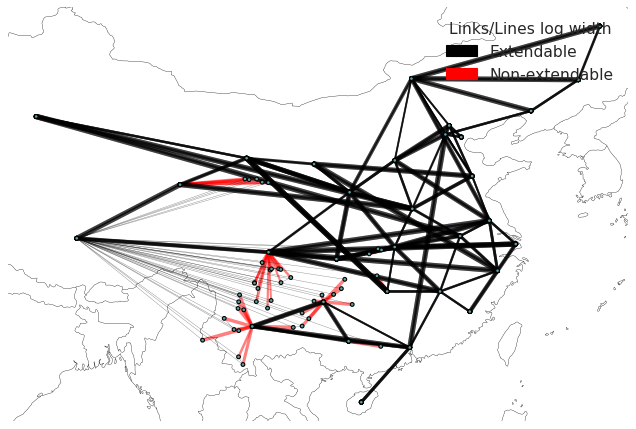

In [16]:

fig, ax = plt.subplots(1, 1, figsize=(10, 10),subplot_kw={"projection":ccrs.PlateCarree()})
def width(x):
    return np.log10(x/1e6).where(x>1,0)
n.plot(ax = ax,link_colors=n.links.p_nom_extendable.apply(lambda x: "red" if not x else "black"),line_colors=n.lines.s_nom_extendable.apply(lambda x: "red" if not x else "black"), link_widths= width(n.links.p_nom_opt) , line_widths=width(n.lines.s_nom_opt), link_alpha=0.5)
# Create custom legend
import matplotlib.patches as mpatches
extendable_patch = mpatches.Patch(color='black', label='Extendable')
non_extendable_patch = mpatches.Patch(color='red', label='Non-extendable')
ax.legend(handles=[extendable_patch, non_extendable_patch], title = "Links/Lines log width")

# Shadow prices & prices

In [17]:
from make_summary import make_summaries
summaries = make_summaries({("exp175-paper", PLANNING_YEAR):ntw_path})

INFO:make_summary:Make summary for scenario ('exp175-paper', 2060), using /p/tmp/ivanra/PyPSA-China-PIK/results/v-0.2.0_Debug_overnight_1hr_res_dscnt6pc_xtraHP/overnight_pthw-exp175_topo-current+FCG_proj-positive/postnetworks/ntwk_2060.nc


INFO:pypsa.io:Imported network ntwk_2060.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/make_summary.py:436: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  .groupby(n.generators.loc[gens, "bus"], axis=1)
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/make_summary.py:436: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  .groupby(n.generators.loc[gens, "bus"], axis=1)
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/make_summary.py:436: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  .groupby(n.generators.loc[gens, "bus"], axis=1)
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/make_summary.py:443: RuntimeWarning: invalid value encountered in scalar divide
  market_values.at[tech, label] = revenue.sum().sum() / dispat

# CO2 emissions

In [18]:
n.global_constraints

type  investment_period carrier_attribute sense  \
GlobalConstraint                                                              
co2_limit         primary_energy                NaN     co2_emissions    <=   

                  constant          mu  
GlobalConstraint                        
co2_limit              0.0 -3235.60534

<Axes: xlabel='snapshot'>

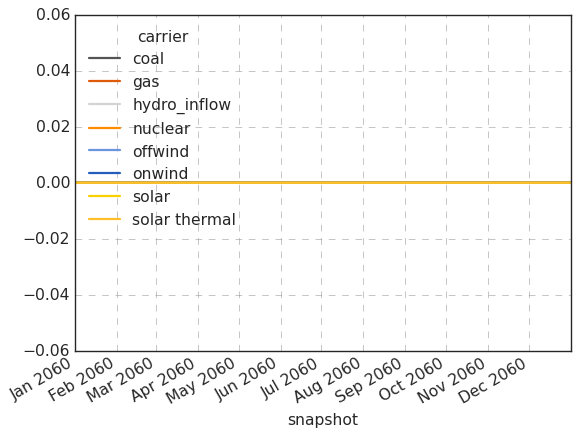

In [19]:
fig, ax = plt.subplots()
# calc the t resolved CO2 emissions from generators
time_res_emissions = ((n.generators_t.p/ n.generators.efficiency)* n.generators.carrier.map(n.carriers.co2_emissions)).T.groupby(n.generators.carrier).sum()
colors = time_res_emissions.T.columns.map(tech_colors).fillna("lightgrey")
time_res_emissions.T.plot(ax =ax, color =  colors, legend = True)

Text(0, 0.5, 'cum CO2 emissions [t]')

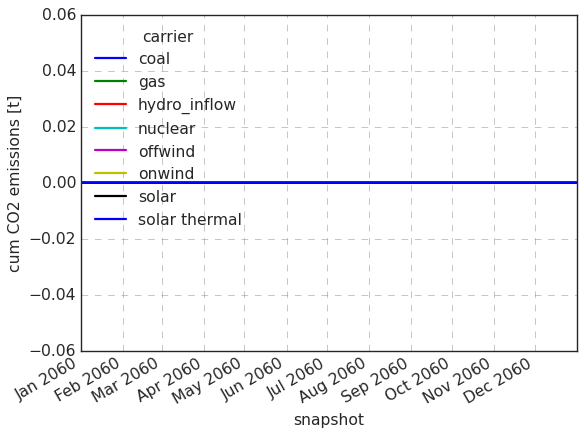

In [20]:
gen_emissions = ((n.generators_t.p/ n.generators.efficiency)* n.generators.carrier.map(n.carriers.co2_emissions)).T.groupby(n.generators.carrier).sum().T.cumsum()
fig, ax = plt.subplots()
gen_emissions.where(gen_emissions>=0).dropna(axis=1, how="all").plot(ax=ax)
ax.set_ylabel("cum CO2 emissions [t]")


Overnight model does not have CO2 capture or biomass stores, skipped


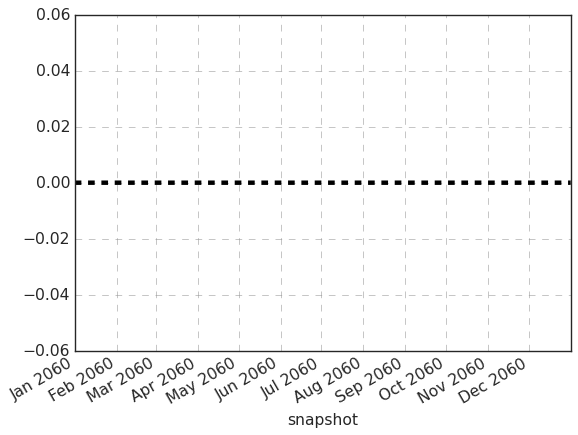

In [21]:
try:
    fig, ax = plt.subplots()
    # calc the t resolved CO2 emissions from generators
    ((n.generators_t.p/ n.generators.efficiency)* n.generators.carrier.map(n.carriers.co2_emissions)).T.groupby(n.generators.carrier).sum().sum().T.cumsum().plot(ax =ax, label = "CO2 emissions (cum)", lw=4, c ="black", ls = "--")
    n.stores_t.e.T.groupby(n.stores.carrier).sum().loc[["CO2","H2", "CO2 capture", "gas", "biomass"]].T.plot(lw=4, cmap ="jet", ax =ax)
    ax.legend()
    ax.semilogy()
    ax.set_ylim(1e3,1e10)
    ax.set_ylabel("carrier stock")
except KeyError:
    print("Overnight model does not have CO2 capture or biomass stores, skipped")

## CO2 capture
! beware the store is the difference :)

In [22]:
try:
    stores = n.stores_t.e.T.groupby(n.stores.carrier).sum()
    diff = stores.iloc[:, -1] -stores.iloc[:, 0]
    co2_cap = stores.iloc[:, -1].loc[["CO2 capture"]].sum()
    co2_cap
except KeyError:
    print("Overnight model does not have CO2 capture or biomass stores, skipped")


Overnight model does not have CO2 capture or biomass stores, skipped


<Axes: xlabel='snapshot'>

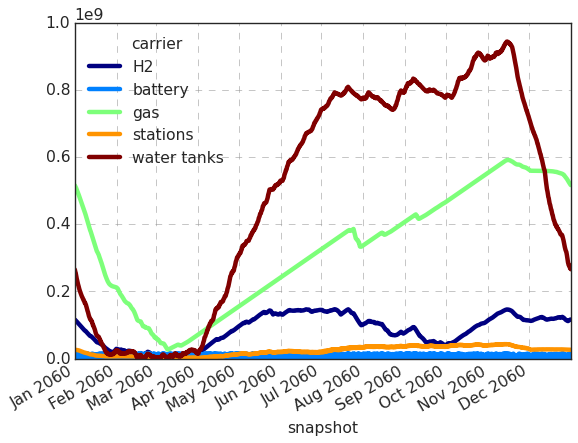

In [23]:
n.stores_t.e.T.groupby(n.stores.carrier).sum().T.plot(lw=4, cmap ="jet")

# plot time series

In [24]:
from plot_time_series import plot_energy_balance

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


Text(0.5, 1.0, 'Electricity Balance')

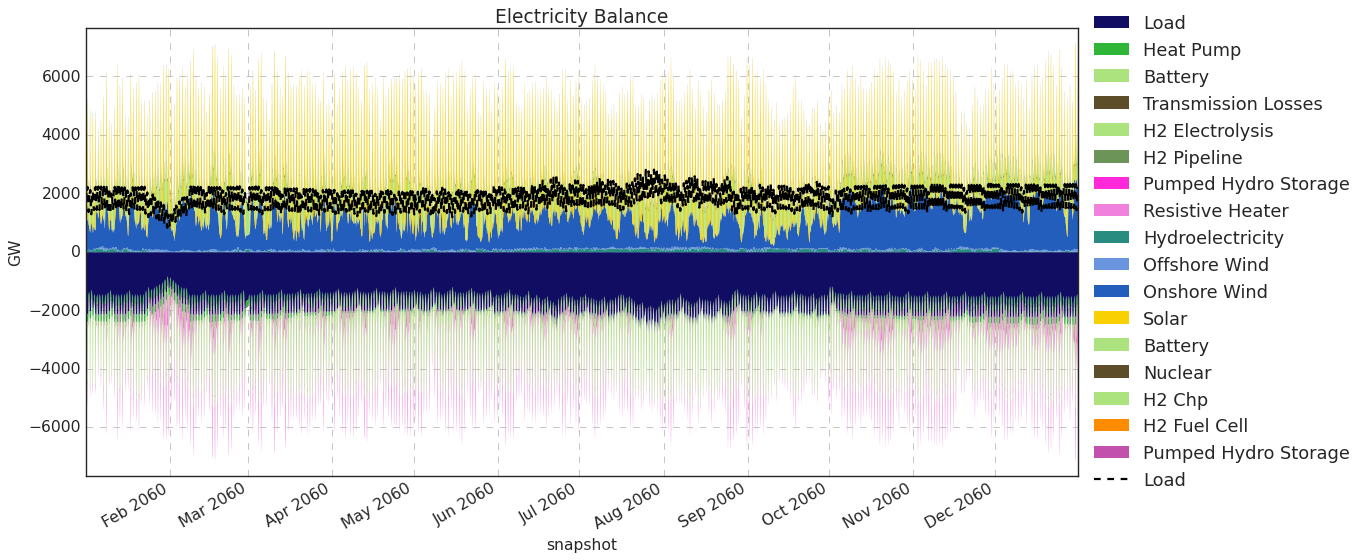

In [57]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-01-01 01:00", end_date=f"{PLANNING_YEAR}-12-31 12:00:00")
ax.grid(axis='y')
ax.set_title("Electricity Balance")

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


Text(0.5, 1.0, 'Electricity Balance')

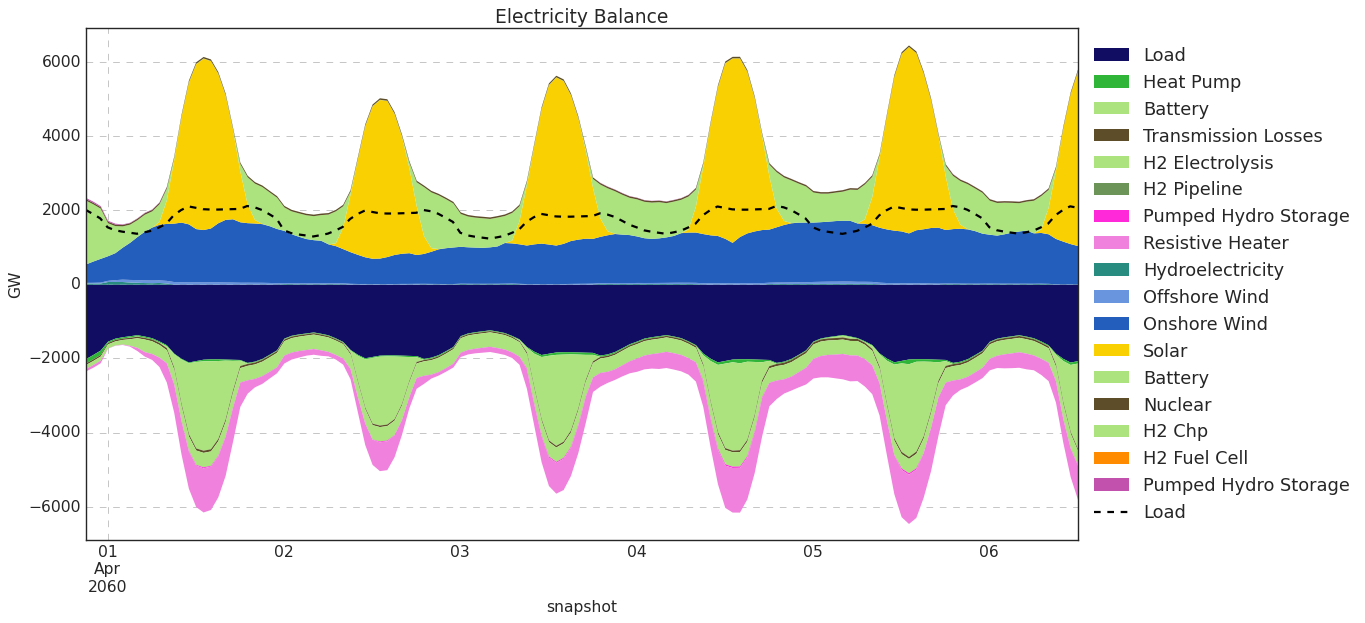

In [25]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-03-31 21:00", end_date=f"{PLANNING_YEAR}-04-06 12:00:00")
ax.grid(axis='y')
ax.set_title("Electricity Balance")

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


Text(0.5, 1.0, 'Heat balance')

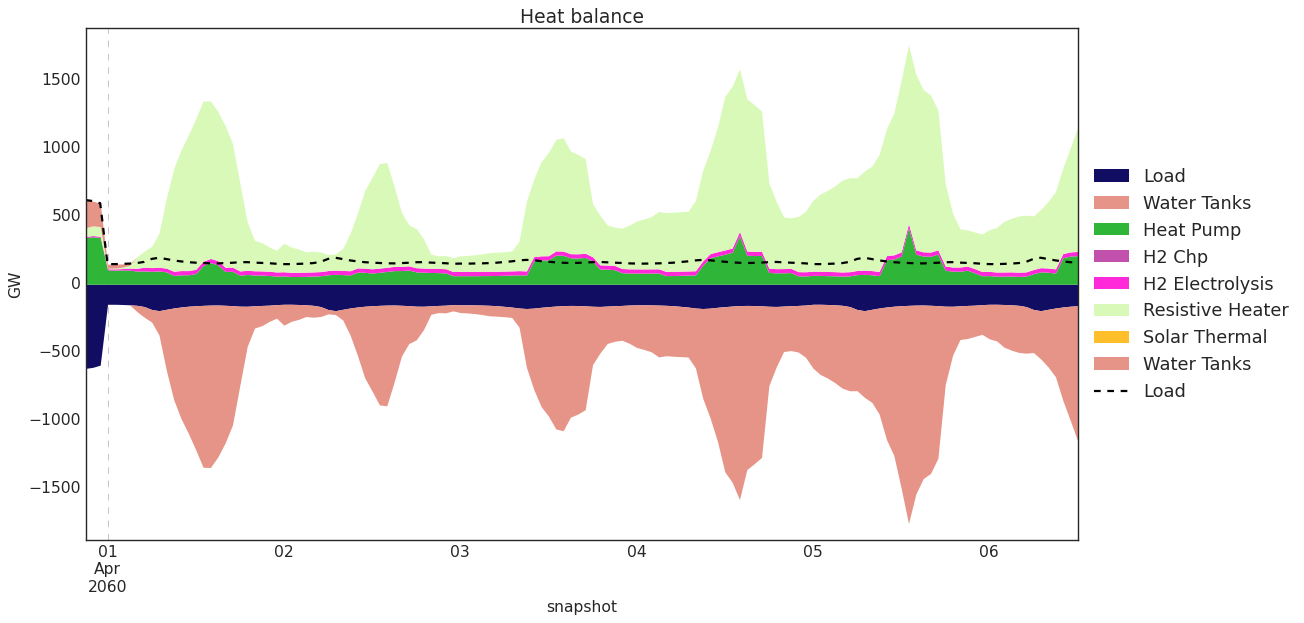

In [26]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-03-31 21:00", end_date=f"{PLANNING_YEAR}-04-06 12:00:00", bus_carrier="heat")
ax.set_title("Heat balance")

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


Text(0.5, 1.0, 'Electricity Balance')

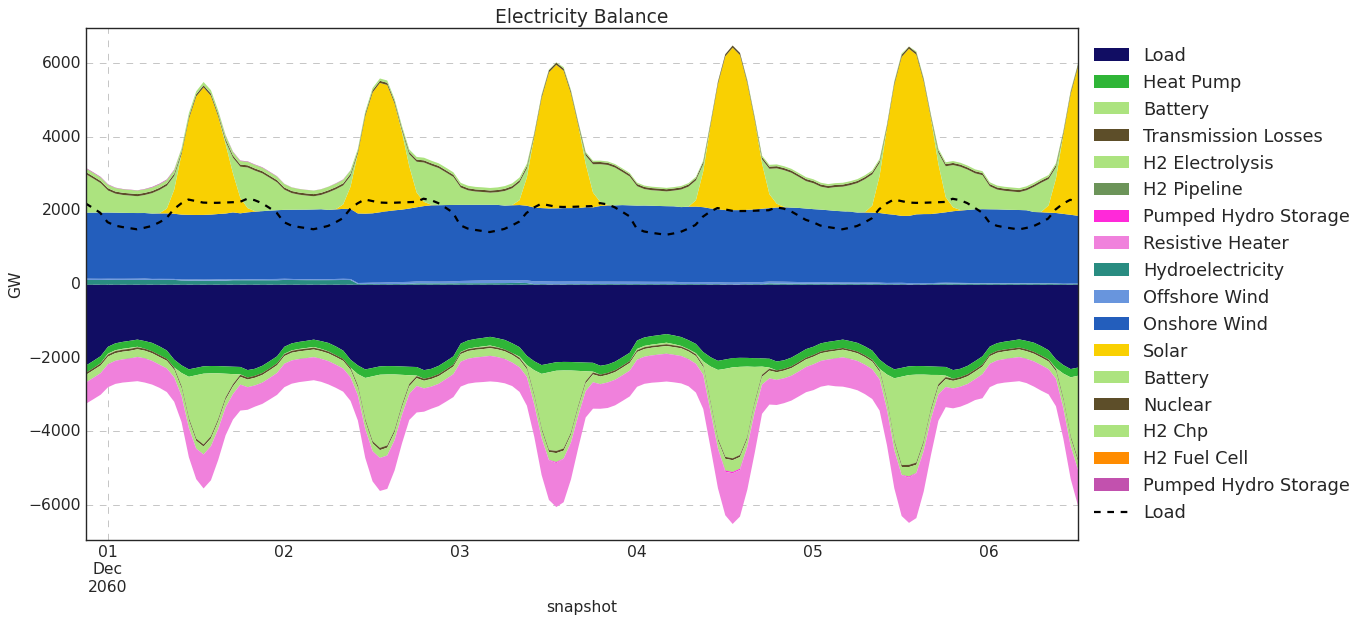

In [27]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-11-30 21:00", end_date=f"{PLANNING_YEAR}-12-06 12:00:00")
ax.grid(axis='y')
ax.set_title("Electricity Balance")

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


Text(0.5, 1.0, 'Heat balance')

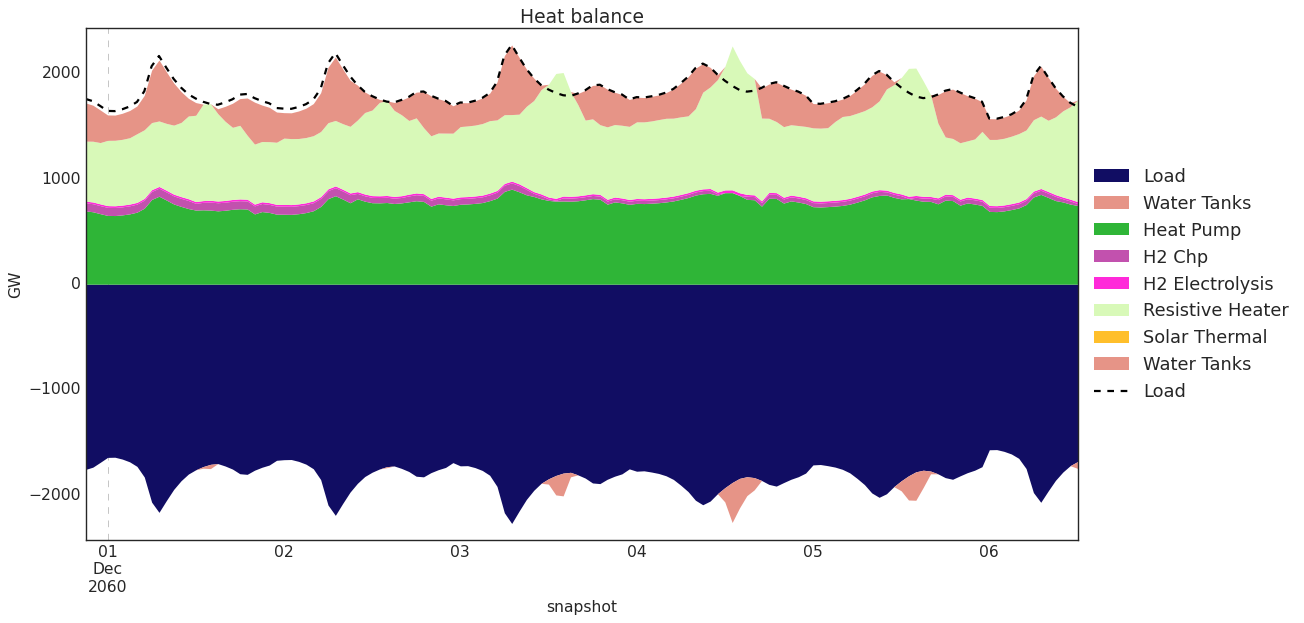

In [28]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-11-30 21:00", end_date=f"{PLANNING_YEAR}-12-06 12:00:00", bus_carrier="heat")
ax.set_title("Heat balance")

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


Text(0.5, 1.0, 'Heat balance')

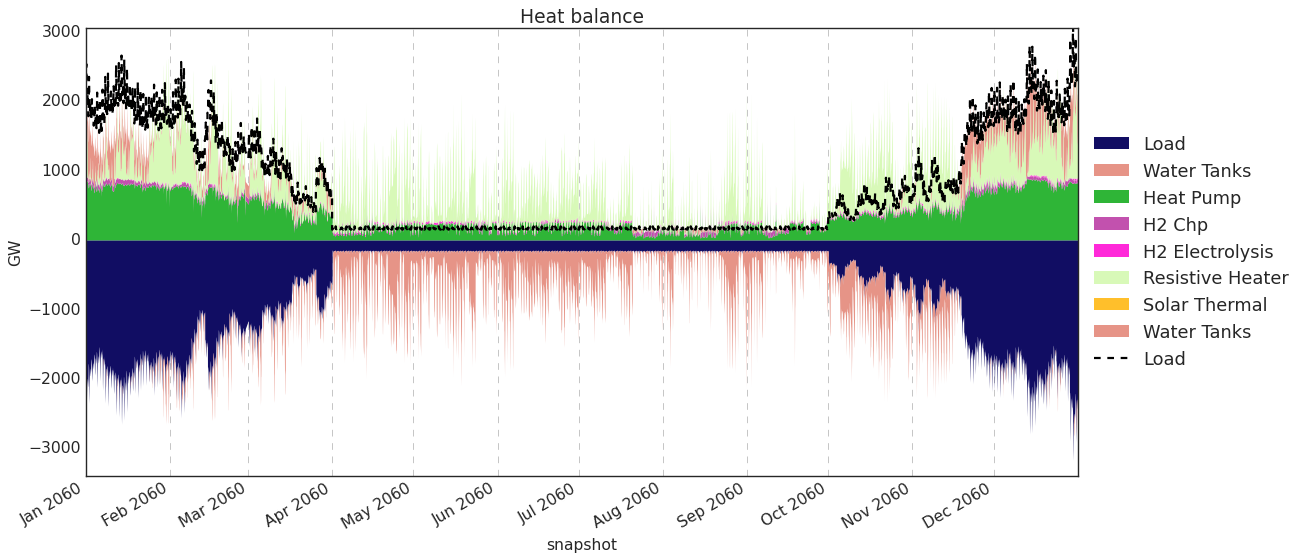

In [29]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-01-01 00:00", end_date=f"{PLANNING_YEAR}-12-31 23:00:00", bus_carrier="heat")
ax.set_title("Heat balance")

In [ ]:
VRE_TECHs= ["Onshore Wind","Offshore Wind","Solar"]
n.statistics.supply(    groupby=get_location_and_carrier,
    aggregate_time=False,
    bus_carrier="AC",
    comps="Generator",)

snapshot                   2060-01-01 00:00:00  2060-01-01 01:00:00  \
location carrier                                                      
Anhui    Coal Power Plant             0.000000             0.000000   
         Onshore Wind                11.246595            10.004593   
         Solar                        0.000000             0.000000   
Beijing  Coal Power Plant             0.000000             0.000000   
         Onshore Wind                 0.179970             0.110566   
...                                        ...                  ...   
Zhejiang Coal Power Plant             0.000000             0.000000   
         Offshore Wind                1.226327             1.011905   
         Onshore Wind             37307.169485         33964.626837   
         Solar                        0.000000             0.000000   
         nuclear                  43506.282615         43506.282611   

snapshot                   2060-01-01 02:00:00  2060-01-01 03:00:00  \
location carrier                                                      
Anhui    Coal Power Plant             0.000000             0.000000   
         Onshore Wind                 8.639896             7.469945   
         Solar                        0.000000             0.000000   
Beijing  Coal Power Plant             0.000000             0.000000   
         Onshore Wind                 0.076482             0.053133   
...                                        ...                  ...   
Zhejiang Coal Power Plant             0.000000             0.000000   
         Offshore Wind                0.787903             0.650339   
         Onshore Wind             29545.312479         24833.786573   
         Solar                        0.000000             0.000000   
         nuclear                  43506.282588         43506.282580   

snapshot                   2060-01-01 04:00:00  2060-01-01 05:00:00  \
location carrier                                                      
Anhui    Coal Power Plant             0.000000             0.000000   
         Onshore Wind                 6.586355             5.747602   
         Solar                        0.000000             0.000000   
Beijing  Coal Power Plant             0.000000             0.000000   
         Onshore Wind                 0.035009             0.028922   
...                                        ...                  ...   
Zhejiang Coal Power Plant             0.000000             0.000000   
         Offshore Wind                0.540905             0.440152   
         Onshore Wind             19479.114170         14621.686382   
         Solar                        0.000000             0.000000   
         nuclear                  43506.282553         43506.285472   

snapshot                   2060-01-01 06:00:00  2060-01-01 07:00:00  \
location carrier                                                      
Anhui    Coal Power Plant             0.000000             0.000000   
         Onshore Wind                 4.696624             3.875427   
         Solar                        0.000000             0.000000   
Beijing  Coal Power Plant             0.000000             0.000000   
         Onshore Wind                 0.016881             0.034218   
...                                        ...                  ...   
Zhejiang Coal Power Plant             0.000000             0.000000   
         Offshore Wind                0.325000             0.294946   
         Onshore Wind              8135.437052          6245.658444   
         Solar                        0.000000             0.000000   
         nuclear                  43506.288754         43506.288730   

snapshot                   2060-01-01 08:00:00  2060-01-01 09:00:00  ...  \
location carrier                                                     ...   
Anhui    Coal Power Plant             0.000000             0.000000  ...   
         Onshore Wind                 3.374198             1.592705  ...   


Text(0.5, 0, 'Hours')

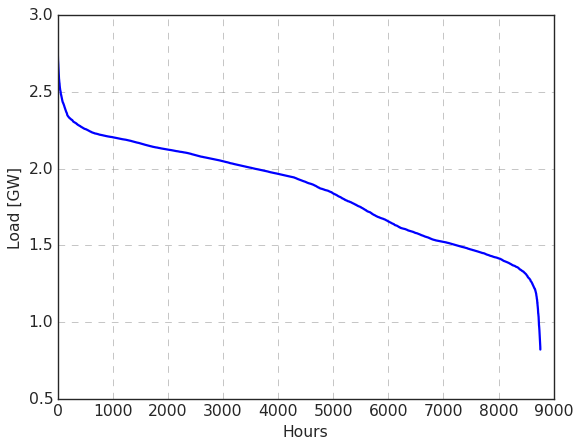

In [65]:
from _helpers import get_location_and_carrier
carrier = "AC"
from constants import PLOT_SUPPLY_LABEL
fig, ax = plt.subplots(figsize=(16, 8))
load = n.statistics.withdrawal(
    groupby=get_location_and_carrier,
    aggregate_time=False,
    bus_carrier=carrier,
    comps="Load",
).sum()
load_curve = load.sort_values(ascending=False) / PLOT_SUPPLY_UNITS
fig, ax = plt.subplots()
ordered_index = load_curve.index
load_curve.reset_index(drop=True).plot(ax=ax)
ax.set_ylabel(f"Load [{PLOT_SUPPLY_LABEL}]")
ax.set_xlabel("Hours")

In [ ]:
n.statisti

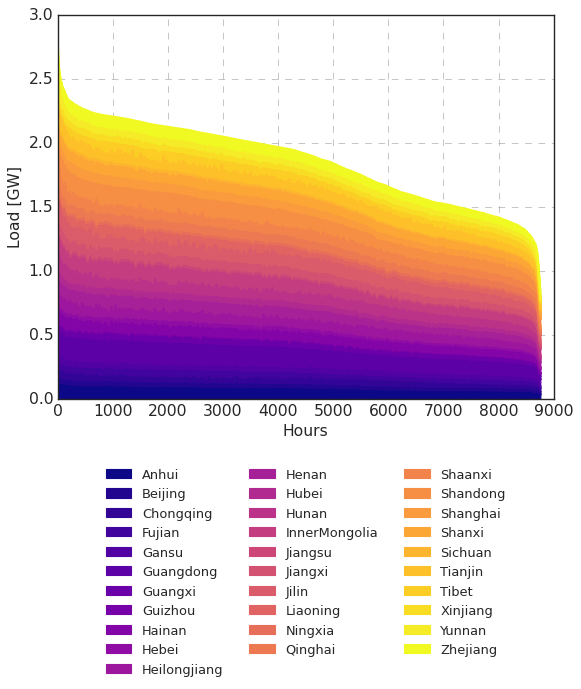

In [74]:

AC_all = n.statistics.withdrawal(groupby=get_location_and_carrier, aggregate_time=False, bus_carrier="AC", comps="Load").sum()
load_curve_all = AC_all.sort_values(ascending=False)/PLOT_SUPPLY_UNITS
regio = n.statistics.withdrawal(groupby=get_location_and_carrier, aggregate_time=False, bus_carrier="AC", comps="Load")
regio = regio.droplevel(1).T
load_curve_regio = regio.loc[load_curve_all.index]/PLOT_SUPPLY_UNITS
fig, ax = plt.subplots()
load_curve_regio.reset_index(drop=True).plot.area(ax=ax, stacked=True, cmap = "plasma", legend=True)
ax.set_ylabel("Load [GW]")
ax.set_xlabel("Hours")
ax.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize='small', title_fontsize='small', fancybox=True, shadow=True)

Text(0, 0.5, 'EnergyDemand / GW')

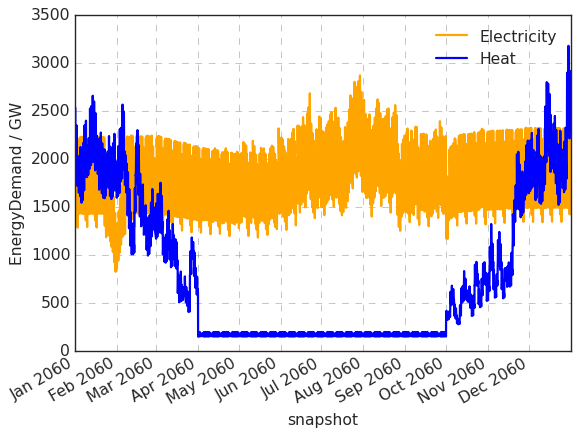

In [34]:
fix, ax = plt.subplots()
ds_AC = n.statistics.withdrawal(bus_carrier="AC", aggregate_time=False).loc[("Load", "-")]/1e3
ds_heat = n.statistics.withdrawal(bus_carrier="heat", aggregate_time=False).loc[("Load", "-")]/1e3
ds_AC.plot(ax=ax, label="Electricity",  c="orange")
ds_heat.plot(ax=ax, label="Heat", c = "blue")
ax.legend()
ax.set_ylabel("EnergyDemand / GW")

### Plot cap factors time series

In [35]:
capacity_factors = n.statistics.capacity_factor(aggregate_time=False).loc[["Generator"]].droplevel(0).T

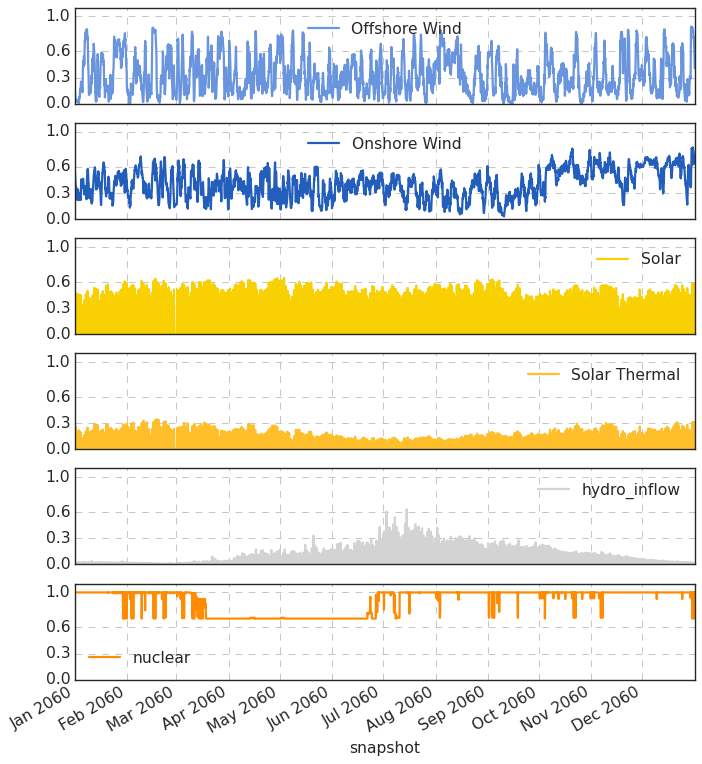

In [36]:
colors_lowered = {k.lower().rstrip():v for k,v in config["plotting"]["tech_colors"].items()}
cap_colors = {k: colors_lowered.get(k.lower().rstrip(), "lightgrey") for k in [c for c in capacity_factors.columns]}
axes = capacity_factors.dropna(axis=1, how="all").fillna(0).plot(subplots=True, figsize=(10,12), color= cap_colors)
for ax in axes:
    ax.set_ylim([0,1.1])
    ax.set_yticks([0,0.3, 0.6,1])

# Pypsa eur

# Plot time series (dev sandbox)

Text(0, 0.5, 'GW')

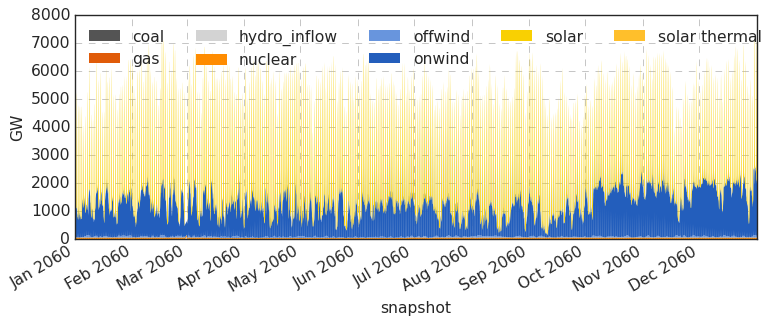

In [37]:
p_by_carrier = n.generators_t.p.T.groupby(n.generators.carrier).sum().T.div(1e3)
fig, ax = plt.subplots(figsize=(11, 4))

p_by_carrier.plot(
    kind="area",
    ax=ax,
    linewidth=0,
    # cmap="tab20b",
    color = p_by_carrier.columns.map(n.carriers.color),
)

ax.legend(ncol=5, loc="upper left", frameon=False)

ax.set_ylabel("GW")

# ax.set_ylim(0, 80);

# COSTS & prices

In [38]:
stores_inflow = n.stores_t.p.sum()
h2_stores= stores_inflow.loc[[c for c in stores_inflow.index if c.find("H2 Store")!=-1]]
h2_stores_inflow = h2_stores.where(h2_stores>0,0).sum()
h2_stores_outflow = h2_stores.where(h2_stores<0,0).sum()

# STATS

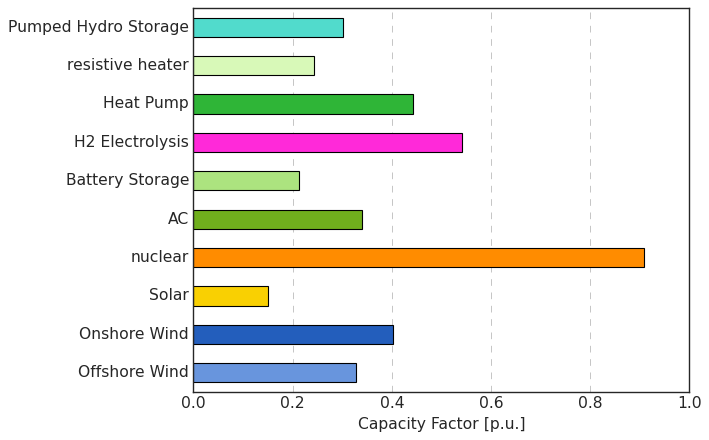

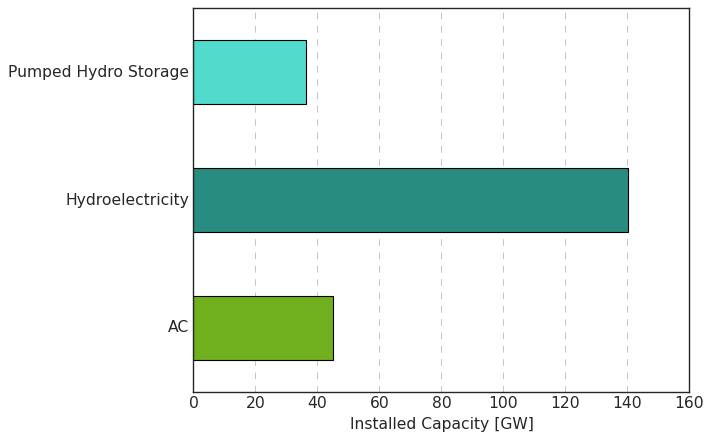

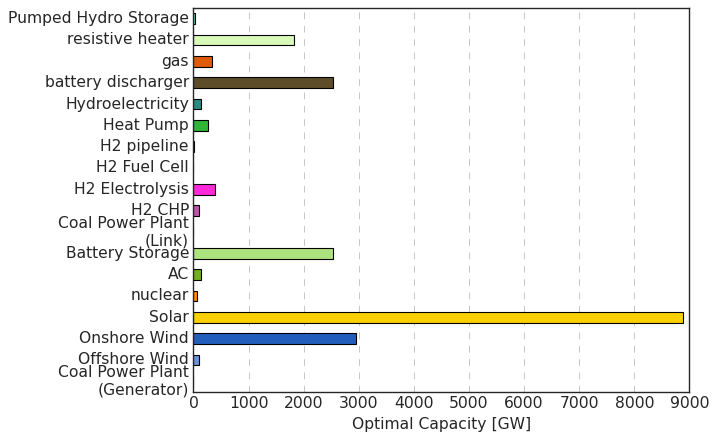

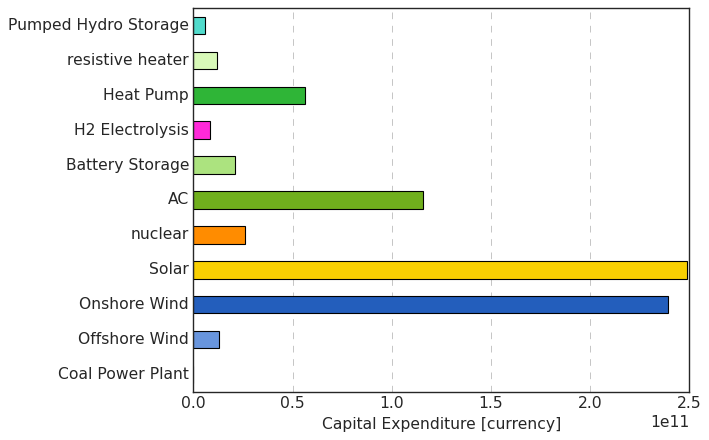

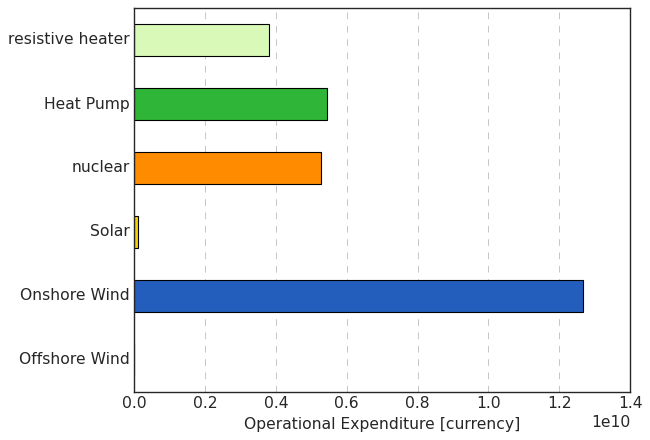

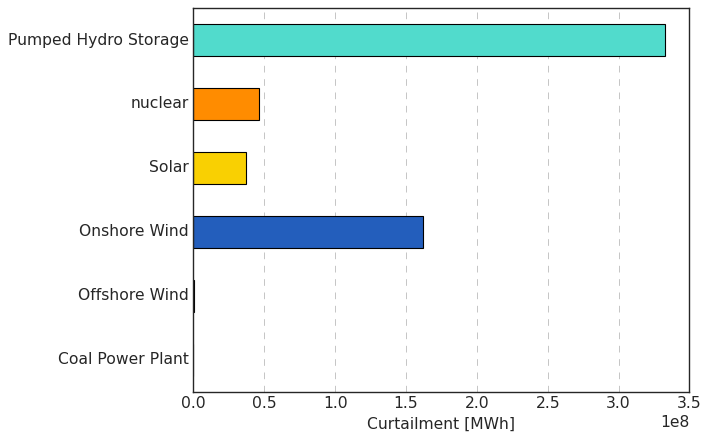

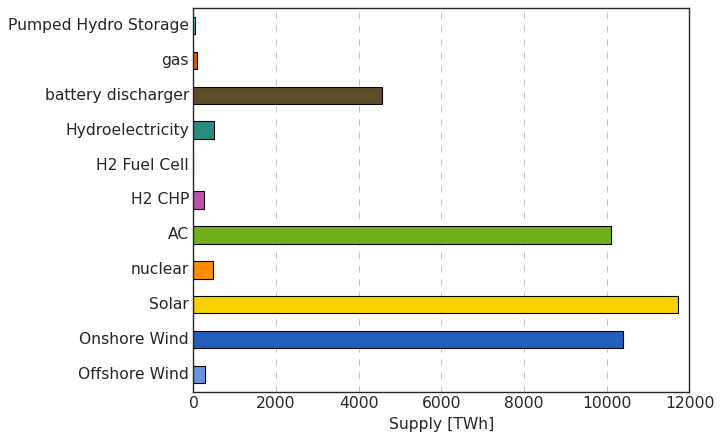

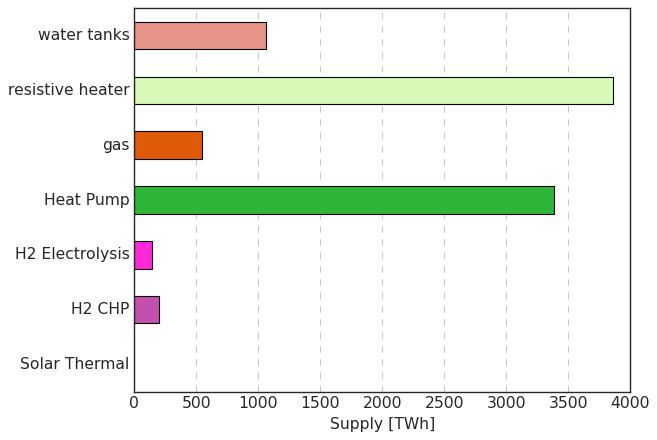

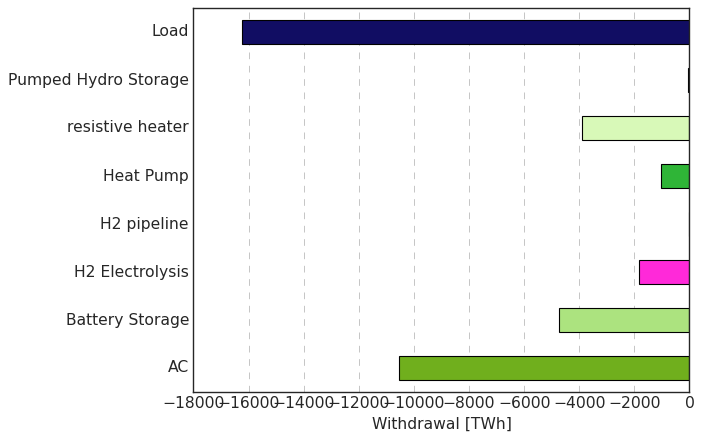

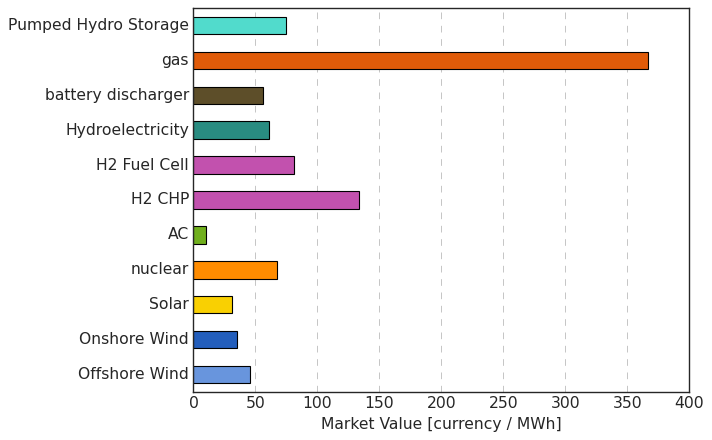

In [39]:
bus_carrier = "AC"
n.loads.carrier = "load"
n.carriers.loc["load", ["nice_name", "color"]] = "Load", "#110d63"
colors = n.carriers.set_index("nice_name").color.where(
    lambda s: s != "", "lightgrey"
)

def rename_index(ds):
    specific = ds.index.map(lambda x: f"{x[1]}\n({x[0]})")
    generic = ds.index.get_level_values("carrier")
    duplicated = generic.duplicated(keep=False)
    index = specific.where(duplicated, generic)
    return ds.set_axis(index)

def plot_static_per_carrier(ds, ax, drop_zero=True):
    if drop_zero:
        ds = ds[ds != 0]
    ds = ds.dropna()
    c = colors[ds.index.get_level_values("carrier")]
    ds = ds.pipe(rename_index)
    label = f"{ds.attrs['name']} [{ds.attrs['unit']}]"
    ds.plot.barh(color=c.values, xlabel=label, ax=ax)
    ax.grid(axis="y")

fig, ax = plt.subplots()
ds = n.statistics.capacity_factor(bus_carrier=bus_carrier).dropna()
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.installed_capacity(bus_carrier=bus_carrier).dropna()
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds.drop(("Generator", "Load"), errors="ignore")
ds = ds / 1e3
ds.attrs["unit"] = "GW"
plot_static_per_carrier(ds.abs(), ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.optimal_capacity(bus_carrier=bus_carrier)
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds.drop(("Generator", "Load"), errors="ignore")
ds = ds.abs() / 1e3
ds.attrs["unit"] = "GW"
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.capex(bus_carrier=bus_carrier)
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.opex(bus_carrier=bus_carrier)
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.curtailment(bus_carrier=bus_carrier)
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.supply(bus_carrier=bus_carrier)
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds / 1e6
ds.attrs["unit"] = "TWh"
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.supply(bus_carrier="heat")
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds / 1e6
ds.attrs["unit"] = "TWh"
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.withdrawal(bus_carrier=bus_carrier)
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds / -1e6
ds.attrs["unit"] = "TWh"
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.market_value(bus_carrier=bus_carrier)
plot_static_per_carrier(ds, ax)
plt.show()

In [40]:
n.buses

v_nom type           x          y  carrier unit  \
Bus                                                                 
Anhui               1.0       117.231214  31.796579       AC        
Beijing             1.0       116.405232  40.171602       AC        
Chongqing           1.0       107.854783  30.041861       AC        
Fujian              1.0       117.967146  26.064535       AC        
Gansu               1.0       101.043962  37.694414       AC        
...                 ...  ...         ...        ...      ...  ...   
Tianjin battery     1.0       117.317074  39.292560  battery        
Tibet battery       1.0        88.163340  31.620638  battery        
Xinjiang battery    1.0        85.089587  40.855665  battery        
Yunnan battery      1.0       101.474773  24.939398  battery        
Zhejiang battery    1.0       120.069427  29.164586  battery        

                  v_mag_pu_set  v_mag_pu_min  v_mag_pu_max control generator  \
Bus                                                                            
Anhui                      1.0           0.0           inf      PQ             
Beijing                    1.0           0.0           inf      PQ             
Chongqing                  1.0           0.0           inf      PQ             
Fujian                     1.0           0.0           inf      PQ             
Gansu                      1.0           0.0           inf      PQ             
...                        ...           ...           ...     ...       ...   
Tianjin battery            1.0           0.0           inf      PQ             
Tibet battery              1.0           0.0           inf      PQ             
Xinjiang battery           1.0           0.0           inf      PQ             
Yunnan battery             1.0           0.0           inf      PQ             
Zhejiang battery           1.0           0.0           inf      PQ             

                 sub_network   location  
Bus                                      
Anhui                             Anhui  
Beijing                         Beijing  
Chongqing                     Chongqing  
Fujian                           Fujian  
Gansu                             Gansu  
...                      ...        ...  
Tianjin battery                 Tianjin  
Tibet battery                     Tibet  
Xinjiang battery               Xinjiang  
Yunnan battery                   Yunnan  
Zhejiang battery               Zhejiang  

[384 rows x 13 columns]

In [41]:
n.statistics.market_value(bus_carrier="AC")

component    carrier             
Generator    Offshore Wind            45.332972
             Onshore Wind             35.227201
             Solar                    30.924938
             nuclear                  67.062412
Link         AC                       10.454213
             Battery Storage                NaN
             H2 CHP                  133.547050
             H2 Electrolysis                NaN
             H2 Fuel Cell             81.000881
             H2 pipeline                    NaN
             Heat Pump                      NaN
             Hydroelectricity         60.532575
             battery discharger       56.214341
             gas                     366.652527
             resistive heater               NaN
Load         Load                           NaN
StorageUnit  Pumped Hydro Storage     74.963951
dtype: float64

In [42]:
n.statistics.market_value(bus_carrier="AC")

component    carrier             
Generator    Offshore Wind            45.332972
             Onshore Wind             35.227201
             Solar                    30.924938
             nuclear                  67.062412
Link         AC                       10.454213
             Battery Storage                NaN
             H2 CHP                  133.547050
             H2 Electrolysis                NaN
             H2 Fuel Cell             81.000881
             H2 pipeline                    NaN
             Heat Pump                      NaN
             Hydroelectricity         60.532575
             battery discharger       56.214341
             gas                     366.652527
             resistive heater               NaN
Load         Load                           NaN
StorageUnit  Pumped Hydro Storage     74.963951
dtype: float64

In [43]:
n.statistics.market_value(groupby=pypsa.statistics.get_carrier_and_bus_carrier)

component    carrier               bus_carrier    
Generator    Offshore Wind         AC                  45.332972
             Onshore Wind          AC                  35.227201
             Solar                 AC                  30.924938
             Solar Thermal         heat                19.585478
             hydro_inflow          stations            28.786452
             nuclear               AC                  67.062412
Link         AC                    AC                  10.454213
             Battery Storage       AC                        NaN
                                   Battery Storage     36.487251
             H2 CHP                AC                 133.547050
                                   H2                        NaN
                                   heat                58.925255
             H2 Electrolysis       AC                        NaN
                                   H2                  22.635054
                                   heat

In [44]:
n.statistics.market_value(groupby=pypsa.statistics.get_carrier_and_bus_carrier, bus_carrier="AC")

component    carrier               bus_carrier
Generator    Offshore Wind         AC              45.332972
             Onshore Wind          AC              35.227201
             Solar                 AC              30.924938
             nuclear               AC              67.062412
Link         AC                    AC              10.454213
             Battery Storage       AC                    NaN
             H2 CHP                AC             133.547050
             H2 Electrolysis       AC                    NaN
             H2 Fuel Cell          AC              81.000881
             H2 pipeline           AC                    NaN
             Heat Pump             AC                    NaN
             Hydroelectricity      AC              60.532575
             battery discharger    AC              56.214341
             gas                   AC             366.652527
             resistive heater      AC                    NaN
Load         Load                  AC 

In [45]:
n.statistics.supply()

component    carrier             
Generator    Offshore Wind           2.869307e+08
             Onshore Wind            1.038347e+10
             Solar                   1.173109e+10
             Solar Thermal           6.364880e+04
             hydro_inflow            3.441111e+08
             nuclear                 4.643899e+08
Store        Battery Storage         4.634867e+09
             H2                      5.684586e+08
             gas                     6.663283e+08
             stations                3.645977e+08
             water tanks             1.260456e+09
Link         AC                      1.010828e+10
             Battery Storage         4.648152e+09
             H2 CHP                  4.492311e+08
             H2 Electrolysis         1.520592e+09
             H2 Fuel Cell            1.926927e+05
             H2 pipeline             1.982485e+09
             Heat Pump               3.388640e+09
             Hydroelectricity        7.865726e+08
             Sab

# brownfield

In [46]:
ds = n.statistics.installed_capacity(bus_carrier=bus_carrier).dropna()

ds = ds[ds != 0]
ds = ds.dropna()
c = colors[ds.index.get_level_values("carrier")]
# ds = ds.pipe(rename_index)
# label = f"{ds.attrs['name']} [{ds.attrs['unit']}]"
# ds.plot.barh(color=c.values, xlabel=label, ax=ax)
# ax.grid(axis="y")
ds

component    carrier             
Link         AC                      -45039.17158
             Hydroelectricity        140322.00000
StorageUnit  Pumped Hydro Storage     36390.00000
dtype: float64

# Network topology
irrelevant as don't have lines

In [47]:
n.determine_network_topology()
n.sub_networks["n_branches"] = [
    len(sn.branches()) for sn in n.sub_networks.obj
]
n.sub_networks["n_buses"] = [len(sn.buses()) for sn in n.sub_networks.obj]

n.sub_networks



carrier         slack_bus  \
SubNetwork                              
0                AC             Anhui   
1                AC           Beijing   
2                AC         Chongqing   
3                AC            Fujian   
4                AC             Gansu   
...             ...               ...   
379         battery   Tianjin battery   
380         battery     Tibet battery   
381         battery  Xinjiang battery   
382         battery    Yunnan battery   
383         battery  Zhejiang battery   

                                                          obj  n_branches  \
SubNetwork                                                                  
0           <pypsa.components.SubNetwork object at 0x7ff6b...           0   
1           <pypsa.components.SubNetwork object at 0x7ff6b...           0   
2           <pypsa.components.SubNetwork object at 0x7ff6b...           0   
3           <pypsa.components.SubNetwork object at 0x7ff6b...           0   
4           <pypsa.components.SubNetwork object at 0x7ff6b...           0   
...                                                       ...         ...   
379         <pypsa.components.SubNetwork object at 0x7ff6b...           0   
380         <pypsa.components.SubNetwork object at 0x7ff6b...           0   
381         <pypsa.components.SubNetwork object at 0x7ff6b...           0   
382         <pypsa.components.SubNetwork object at 0x7ff6b...           0   
383         <pypsa.components.SubNetwork object at 0x7ff6b...           0   

            n_buses  
SubNetwork           
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
...             ...  
379               1  
380               1  
381               1  
382               1  
383               1  

[384 rows x 5 columns]

# EXAMPLES